In [3]:
import pandas as pd
import numpy as np
import sklearn

In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cust_df = pd.read_csv('customer_data_ratio20.csv')
pay_df = pd.read_csv('payment_data_ratio20.csv')

In [264]:
cust_df.head(10)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,1,54984789,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,0,58984557,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


In [4]:
cust_df.shape

(1125, 13)

In [40]:
pay_df.head(10)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,prod_code_str
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN,10
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN,5
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016,5
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016,10
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016,10
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016,10
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN,10
7,54987756,0,0,0,0,2,1,NaN,02/12/2016,365331.6,304943.0,NaN,1
8,58988028,0,0,0,0,4,0,NaN,02/12/2016,16795.2,28500.0,19/04/2016,Others
9,58993180,0,0,0,0,3,6,NaN,02/12/2016,26688.0,31300.0,20/03/2016,6


In [7]:
pay_df.shape

(8250, 12)

In [9]:
cust_df['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

In [10]:
pay_df.dtypes

OVD_t1               int64
OVD_t2               int64
OVD_t3               int64
OVD_sum              int64
pay_normal           int64
prod_code            int64
prod_limit         float64
update_date         object
new_balance        float64
highest_balance    float64
report_date         object
dtype: object

In [13]:
pay_df['prod_code'].value_counts()

10    4523
6     1144
5      962
1      427
13     425
2      239
0      147
7      147
12      56
19      35
8       24
24      24
17      22
15      22
3       21
26      14
25       5
4        4
9        3
27       3
22       3
Name: prod_code, dtype: int64

# Data Cleaning & Feature Creation

In [12]:
pay_df.fillna(0,inplace=True) # Filling up the missing values

In [3]:
pay_df['update_date'] = pay_df['update_date'].astype('datetime64[ns]')# Converting to Date data type

In [12]:
pay_df.columns

Index(['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code',
       'prod_limit', 'update_date', 'new_balance', 'highest_balance',
       'report_date'],
      dtype='object')

In [20]:
##Splitting the prod codes based on the frequency
pay_df.loc[pay_df.prod_code == 10, 'prod_code_str'] = '10' 
pay_df.loc[pay_df.prod_code == 6, 'prod_code_str'] = '6'
pay_df.loc[pay_df.prod_code == 5, 'prod_code_str'] = '5' 
pay_df.loc[pay_df.prod_code == 1, 'prod_code_str'] = '1'
pay_df.loc[pay_df.prod_code == 13, 'prod_code_str'] = '13' 
pay_df['prod_code_str'] = pay_df['prod_code_str'].replace(np.nan, 'Others', regex=True)

pay_df2 = pay_df.groupby(['id','prod_code_str']).agg({'OVD_t1':'sum','OVD_t2':'sum','OVD_t3':'sum','OVD_sum':'max','pay_normal':'max'}).reset_index()
## Excluding Update Date & Record Date due to lack of clarity. 
##Please Note All features are calculated considering records as of today without time based features

In [5]:
pay_df3 = pd.pivot_table(pay_df2, index= 'id', columns='prod_code_str',
               values=['OVD_t1','OVD_t2','OVD_t3','OVD_sum','pay_normal'],fill_value=-555)
# transposing the table to analyse the overdue behaviour each productwise
# missing values to be replaced -555

In [246]:
pay_df3.head(10)

OVD_sum                                 OVD_t1                 \
prod_code_str       1     10     13     5    6 Others      1   10   13    5   
id                                                                            
54982353            0  31500   -555  -555 -555      0      0    3 -555 -555   
54982356         -555      0   -555  -555    0      0   -555    0 -555 -555   
54982387            0     11   -555  -555    0   -555      0    3 -555 -555   
54982463         -555   -555      0     0 -555   -555   -555 -555    0    0   
54982530         -555      0   -555  -555 -555   -555   -555    0 -555 -555   
54982549            0   -555   -555     0    0    330      0 -555 -555    0   
54982579            0     17   -555  -555 -555      0      0    1 -555 -555   
54982665         -555  11906   -555     0 -555   -555   -555    0 -555    0   
54982697         -555      0   -555  -555 -555   -555   -555    0 -555 -555   
54982721            0      0  30600  2897    0      0      0    0    0    2   

                          OVD_t2                            OVD_t3            \
prod_code_str    6 Others      1   10   13    5    6 Others      1   10   13   
id                                                                             
54982353      -555      0      0    2 -555 -555 -555      0      0   38 -555   
54982356         0      0   -555    0 -555 -555    0      0   -555    0 -555   
54982387         0   -555      0    0 -555 -555    0   -555      0    0 -555   
54982463      -555   -555   -555 -555    0    0 -555   -555   -555 -555    0   
54982530      -555   -555   -555    0 -555 -555 -555   -555   -555    0 -555   
54982549         0      6      0 -555 -555    0    0      2      0 -555 -555   
54982579      -555      0      0    0 -555 -555 -555      0      0    0 -555   
54982665      -555   -555   -555    2 -555    0 -555   -555   -555   26 -555   
54982697      -555   -555   -555    0 -555 -555 -555   -555   -555    0 -555   
54982721         0      0      0    0    0    1    0      0      0    0   34   

                               pay_normal                             
prod_code_str    5    6 Others          1   10   13    5    6 Others  
id                                                                    
54982353      -555 -555      0          1   35 -555 -555 -555     11  
54982356      -555    0      0       -555   36 -555 -555   10     18  
54982387      -555    0   -555         28   36 -555 -555   15   -555  
54982463         0 -555   -555       -555 -555   19   15 -555   -555  
54982530      -555 -555   -555       -555   25 -555 -555 -555   -555  
54982549         0    0      0         33 -555 -555   36   11     30  
54982579      -555 -555      0         33   36 -555 -555 -555     36  
54982665         0 -555   -555       -555   18 -555    1 -555   -555  
54982697      -555 -555   -555       -555   28 -555 -555 -555   -555  
54982721         9    0      0          8   36   20    9    8      1

In [6]:
pay_df4 = pd.DataFrame(pay_df3.to_records()) 

In [7]:
pay_df_main = pay_df4.merge(pay_df2,left_on='id',right_on='id') # combining both local & global features

In [82]:
Count_prod = pd.DataFrame(pay_df2.groupby('id').prod_code_str.nunique()) # count of products a customer holds

In [89]:
Count_prod.reset_index(inplace=True)

In [92]:
Count_prod = Count_prod.rename(index=str, columns={"prod_code_str": "Count of products"})

In [93]:
pay_df_main = pay_df_main.merge(Count_prod,left_on='id',right_on='id')

In [95]:
cust_df.set_index('id',inplace=True)
pay_df_main.set_index('id',inplace=True)

In [187]:
df_main = cust_df.merge(pay_df_main,left_index=True,right_index=True)

In [188]:
df_main = df_main.drop(columns=['prod_code_str'])

In [190]:
df_main.columns

Index(['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11', '('OVD_sum', '1')',
       '('OVD_sum', '10')', '('OVD_sum', '13')', '('OVD_sum', '5')',
       '('OVD_sum', '6')', '('OVD_sum', 'Others')', '('OVD_t1', '1')',
       '('OVD_t1', '10')', '('OVD_t1', '13')', '('OVD_t1', '5')',
       '('OVD_t1', '6')', '('OVD_t1', 'Others')', '('OVD_t2', '1')',
       '('OVD_t2', '10')', '('OVD_t2', '13')', '('OVD_t2', '5')',
       '('OVD_t2', '6')', '('OVD_t2', 'Others')', '('OVD_t3', '1')',
       '('OVD_t3', '10')', '('OVD_t3', '13')', '('OVD_t3', '5')',
       '('OVD_t3', '6')', '('OVD_t3', 'Others')', '('pay_normal', '1')',
       '('pay_normal', '10')', '('pay_normal', '13')', '('pay_normal', '5')',
       '('pay_normal', '6')', '('pay_normal', 'Others')', 'OVD_t1', 'OVD_t2',
       'OVD_t3', 'OVD_sum', 'pay_normal', 'Count of products'],
      dtype='object')

### Data Exploration

In [135]:
pd.set_option('display.max_columns', 500)
corr = df_main.corr()

In [193]:
df_main.columns

Index(['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11', '('OVD_sum', '1')',
       '('OVD_sum', '10')', '('OVD_sum', '13')', '('OVD_sum', '5')',
       '('OVD_sum', '6')', '('OVD_sum', 'Others')', '('OVD_t1', '1')',
       '('OVD_t1', '10')', '('OVD_t1', '13')', '('OVD_t1', '5')',
       '('OVD_t1', '6')', '('OVD_t1', 'Others')', '('OVD_t2', '1')',
       '('OVD_t2', '10')', '('OVD_t2', '13')', '('OVD_t2', '5')',
       '('OVD_t2', '6')', '('OVD_t2', 'Others')', '('OVD_t3', '1')',
       '('OVD_t3', '10')', '('OVD_t3', '13')', '('OVD_t3', '5')',
       '('OVD_t3', '6')', '('OVD_t3', 'Others')', '('pay_normal', '1')',
       '('pay_normal', '10')', '('pay_normal', '13')', '('pay_normal', '5')',
       '('pay_normal', '6')', '('pay_normal', 'Others')', 'OVD_t1', 'OVD_t2',
       'OVD_t3', 'OVD_sum', 'pay_normal', 'Count of products'],
      dtype='object')

In [142]:
df_main.drop('OVD_sum',inplace=True,axis=1) ## high correlation

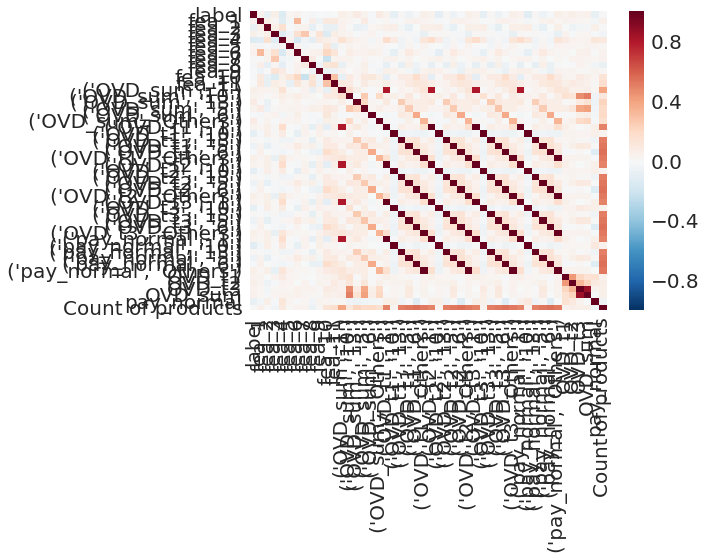

In [132]:
import seaborn as sns
corr = df_main.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [18]:
plot = pay_df.merge(cust_df[['id','label']],left_on='id',right_on='id')

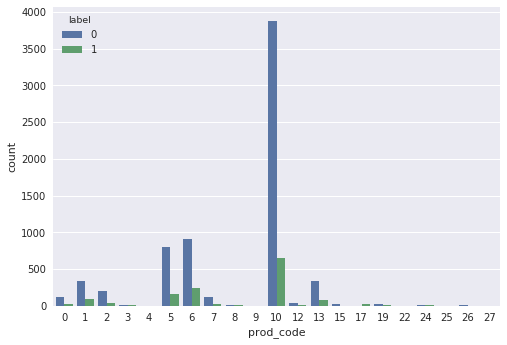

In [19]:
ax = sns.countplot(x="prod_code", data=plot,hue="label")

Text(0,0.5,'Max Over Due')

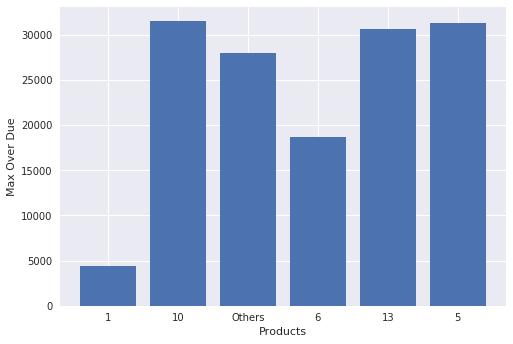

In [23]:
plt.bar(pay_df2.prod_code_str,pay_df2.OVD_sum)
plt.xlabel('Products')
plt.ylabel('Max Over Due')

Text(0,0.5,'Type 1 Overdue')

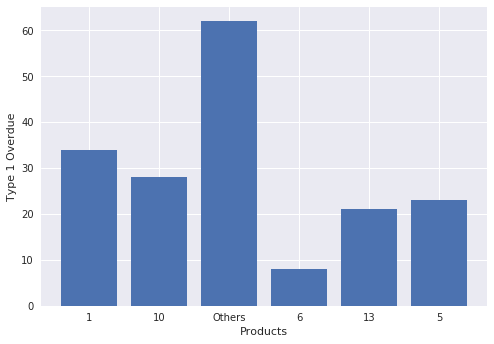

In [32]:
plt.bar(pay_df2.prod_code_str,pay_df2.OVD_t1)
plt.xlabel('Products')
plt.ylabel('Type 1 Overdue')

Text(0,0.5,'Type 2 Overdue')

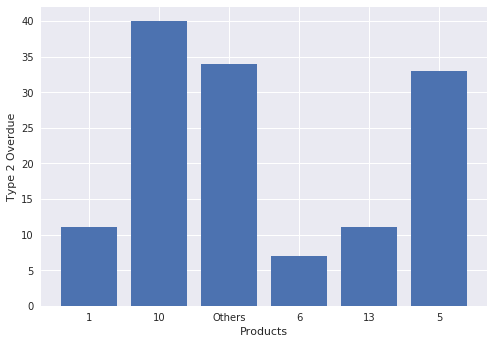

In [33]:
plt.bar(pay_df2.prod_code_str,pay_df2.OVD_t2)
plt.xlabel('Products')
plt.ylabel('Type 2 Overdue')

Text(0,0.5,'Type 3 Overdue')

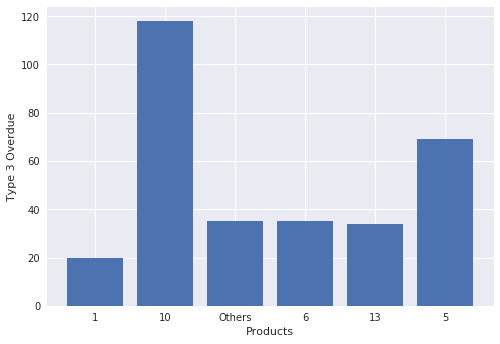

In [34]:
plt.bar(pay_df2.prod_code_str,pay_df2.OVD_t3)
plt.xlabel('Products')
plt.ylabel('Type 3 Overdue')

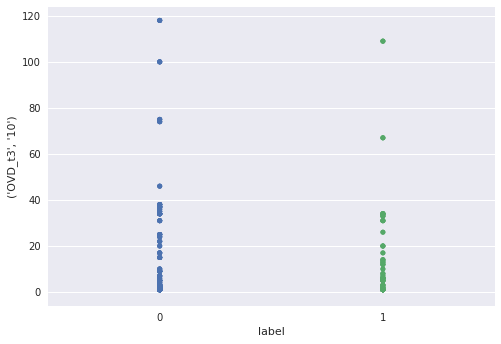

In [39]:
sns.stripplot(x="label", y="('OVD_t3', '10')", data=df_main[df_main["('OVD_t3', '10')"] >0])

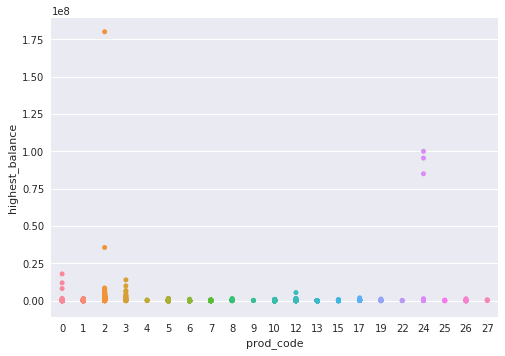

In [42]:
sns.stripplot(x="prod_code", y="highest_balance", data=pay_df[pay_df["highest_balance"].notnull()])

### Model Prep 

In [44]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df_main.fillna(0,inplace=True)

In [51]:
y = df_main.label
X = df_main.drop(['label'], axis=1)

In [52]:
X_n = X.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,13,14,15,33,36,37,38,41,42,44,45]]
# exluded highly correlated variables from the data to avoid overfitting

### Splitting the Data into train & test samples 

In [53]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_n, y, test_size=0.20, random_state=42)

In [214]:
test_y.value_counts()

0    464
1    124
Name: label, dtype: int64

In [215]:
train_y.value_counts()

0    1892
1     460
Name: label, dtype: int64

### Training RandomForest model

In [55]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,verbose = True)
## Building simple model , further parameter tuning can also be done based on cross validation
## Depth of the tree & number of trees can tuned to control overfitting
model.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [217]:
model.score(test_X, test_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9421768707482994

In [239]:
y_class = pd.DataFrame(model.predict(test_X))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


### Lets adjust the prediction class probability , the objective is to capture the risky cases as much as possible

In [245]:
y_pred = model.predict_proba(test_X)
thresh = 0.40
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(test_y, thresh_pred, target_names=['Low Risk', 'High Risk']))
## Ideally the recall of the model should be highest so that we can identify all risk cases


              precision    recall  f1-score   support

    Low Risk       0.95      0.98      0.97       464
   High Risk       0.91      0.82      0.86       124

   micro avg       0.95      0.95      0.95       588
   macro avg       0.93      0.90      0.92       588
weighted avg       0.94      0.95      0.94       588



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


### Getting the most important features used in the model

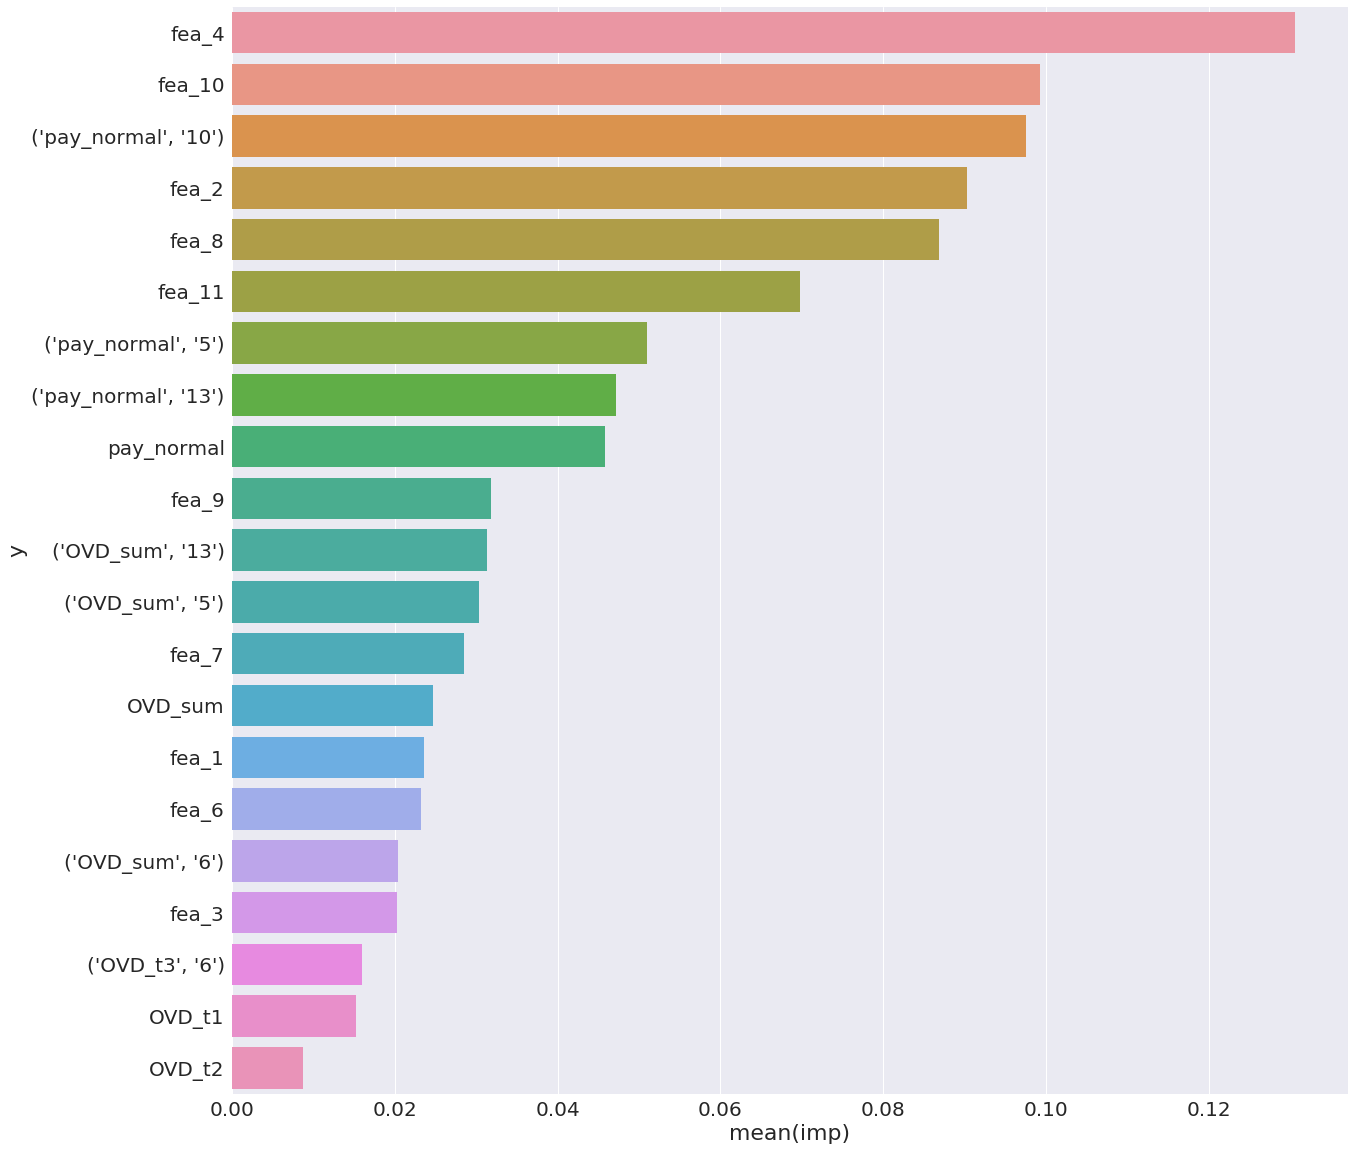

In [219]:
imp = pd.DataFrame([model.feature_importances_]).T
imp.index = pd.DataFrame(train_X).columns
imp.columns = ['imp']

imp = imp.sort_values('imp')
imp['y'] = imp.index

import seaborn as sns
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.barplot(x='imp',y='y',data=imp.iloc[:0:-1])
# plt.savefig('importance.png', bbox_inches = 'tight')

In [220]:
y_score = model.predict_proba(test_X)
y_test = test_y
y_score = y_score[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
sns.set(style='whitegrid', font_scale=2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


###  Roc chart to test the sensitivitty & specificity of the model

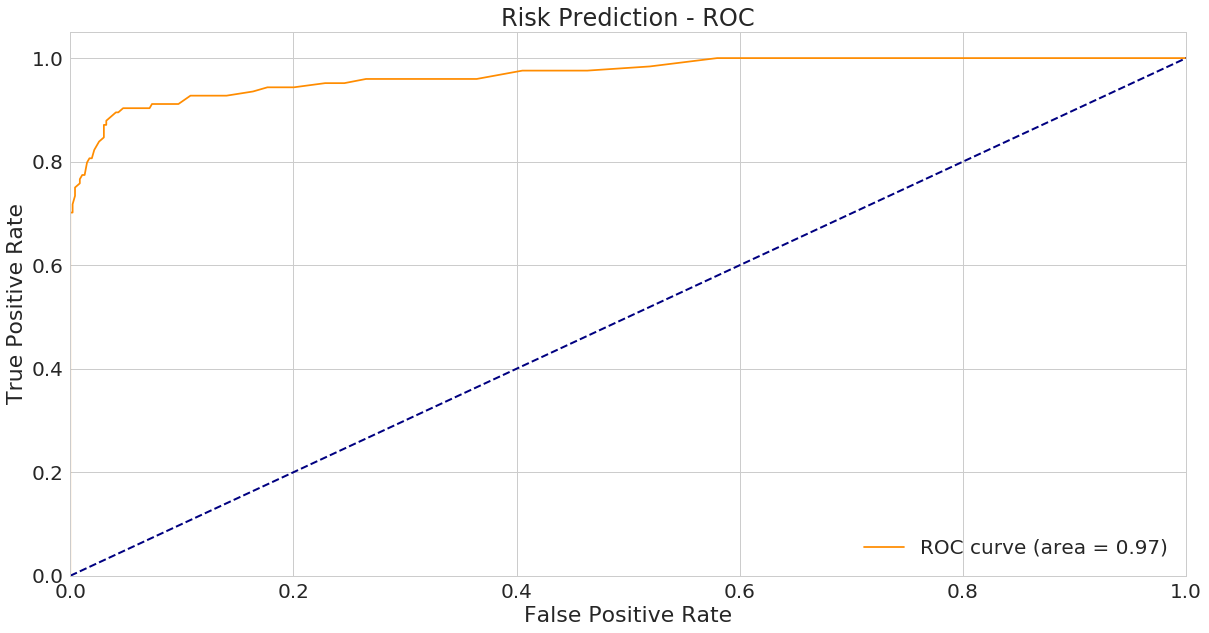

In [221]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

### Lets Analyse the prediction behaviour of the model using Shap values

In [57]:
import shap
shap.initjs()
## Used to explain output of ML models intuitvely using a technique used in Game Theory

In [58]:
explainer = shap.TreeExplainer(model)

In [59]:
shap_values = explainer.shap_values(test_X)

In [252]:
shap.force_plot(explainer.expected_value[1],shap_values[1])

### Below plot shows how are the predictors contributing to each of the class 

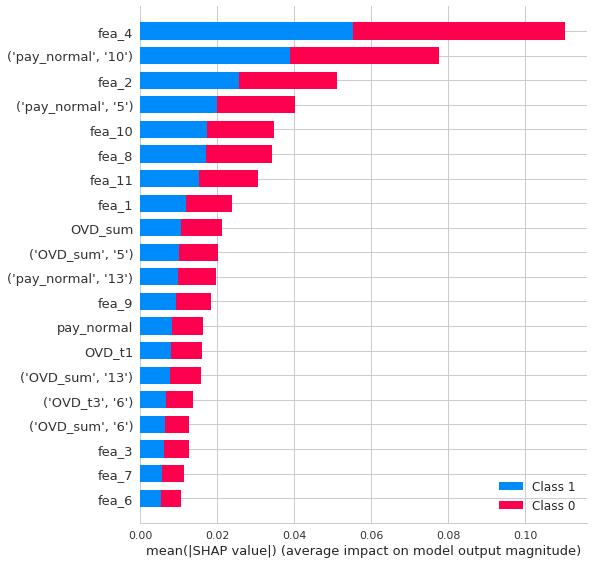

In [253]:
shap.summary_plot(shap_values, test_X)